In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
from tqdm import tqdm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from constants import DATA_DIR, idx_to_class
from classify import STL, BoWClassifier, relevant_classes

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


### Dataset object

In [3]:
TRAIN_X_PATH = join(DATA_DIR, "train_X.bin")
TRAIN_y_PATH = join(DATA_DIR, "train_y.bin")

TEST_X_PATH = join(DATA_DIR, "test_X.bin")
TEST_y_PATH = join(DATA_DIR, "test_y.bin")

### Classifier object

In [4]:
bow = BoWClassifier()

In [5]:
bow.fit(train_data_path=TRAIN_X_PATH, train_label_path=TRAIN_y_PATH, show_steps=False)

::::::::: Loaded dataset with images ((5000, 96, 96, 3)) and labels ((5000,)) ::::::::::


Extracting image features with SIFT: 100%|██████████| 5000/5000 [00:09<00:00, 541.78it/s]                                             


::::: Loading pre-saved k-means clustering model from ./checkpoints/kmeans_500.pkl


Encoding features: 100%|██████████| 1250/1250 [00:01<00:00, 627.92it/s]                                                               


............... SVM Trained with following results on the training set ...............
..... Model: OneVsRestClassifier(estimator=SVC(probability=True))
..... Dataset: kMeans: X (93203, 128) SVM: X ((1250, 500))
..... Hyperparameters: Number of clusters 500
|                   |   airplane |     bird |   ship |    horse |   car |     mean |
|:------------------|-----------:|---------:|-------:|---------:|------:|---------:|
| Average Precision |   0.937561 | 0.874007 |      0 | 0.955671 |     0 | 0.553448 |


::::::::: Loaded dataset with images ((8000, 96, 96, 3)) and labels ((8000,)) ::::::::::


Encoding features: 100%|██████████| 8000/8000 [00:10<00:00, 731.28it/s]                                                               


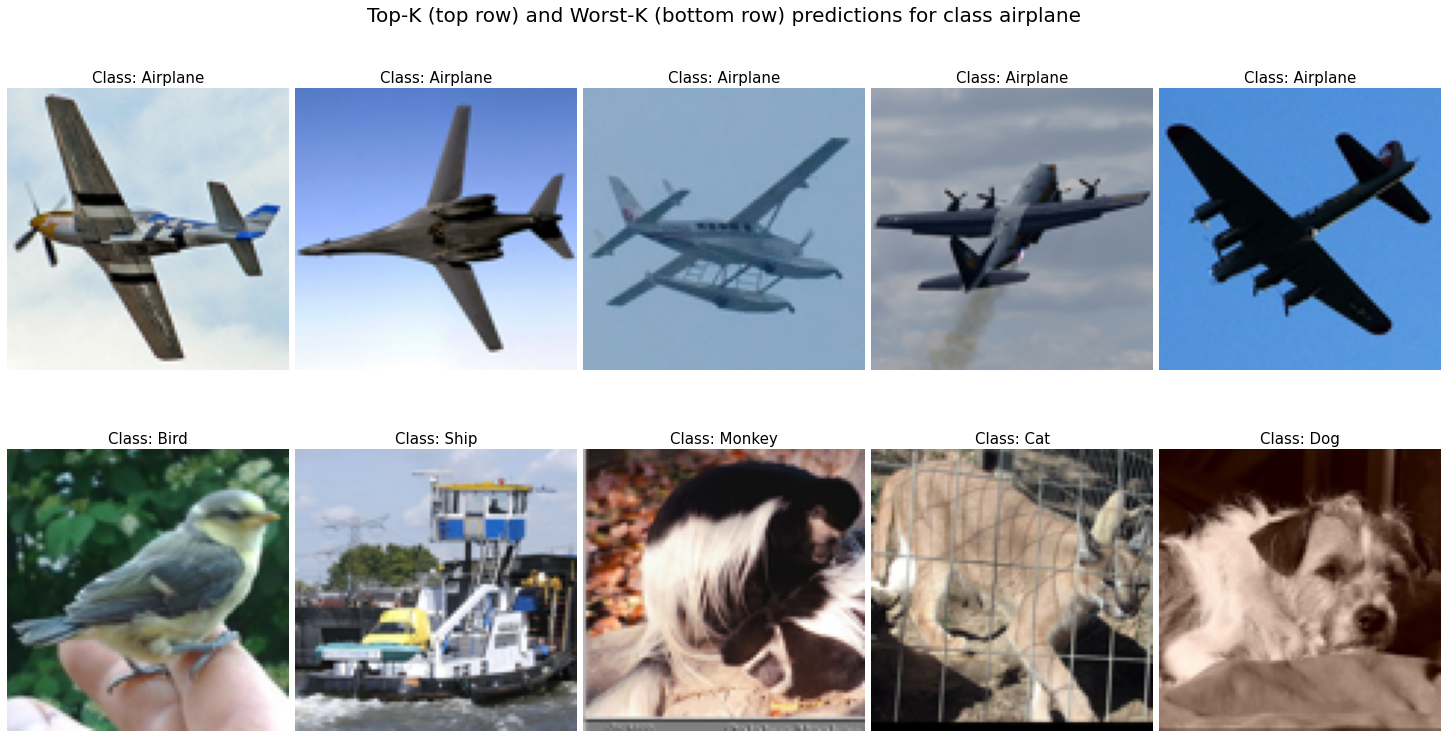

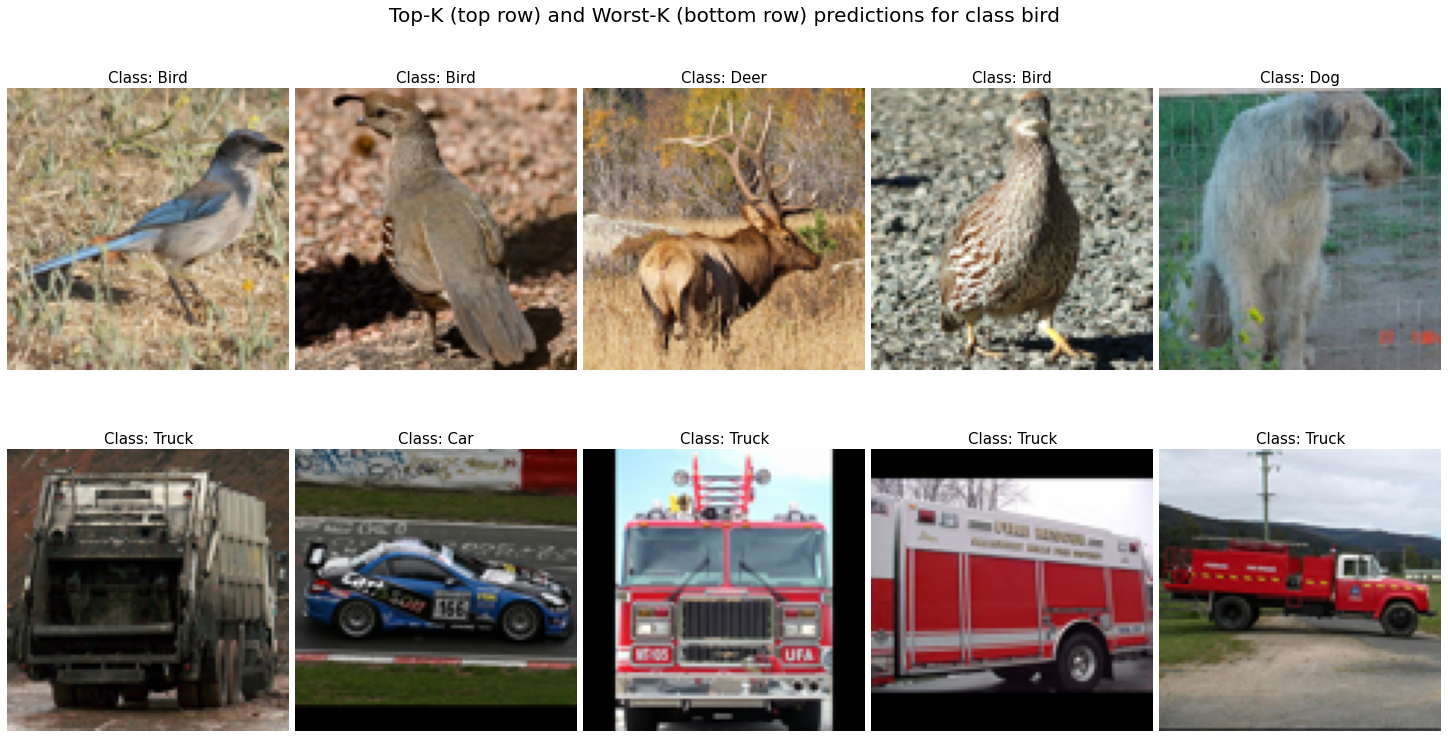

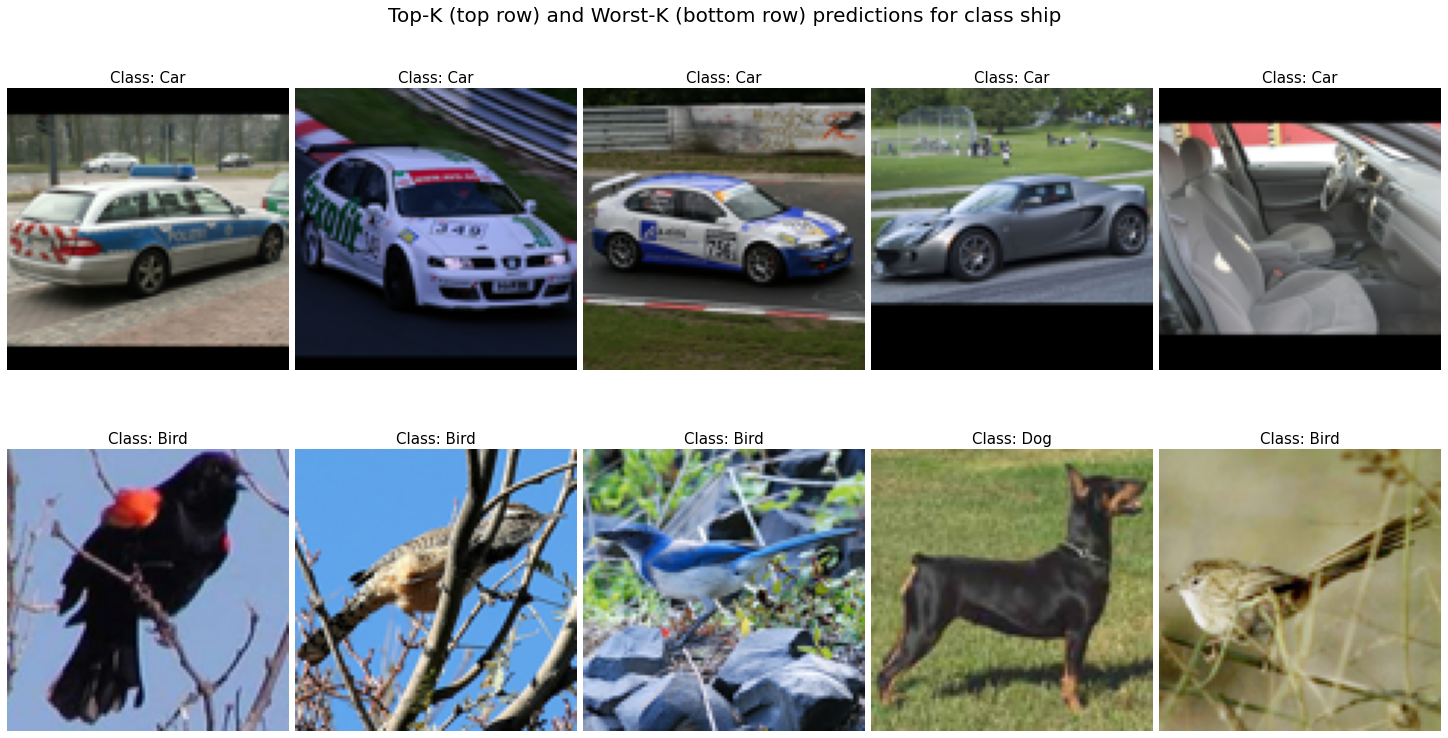

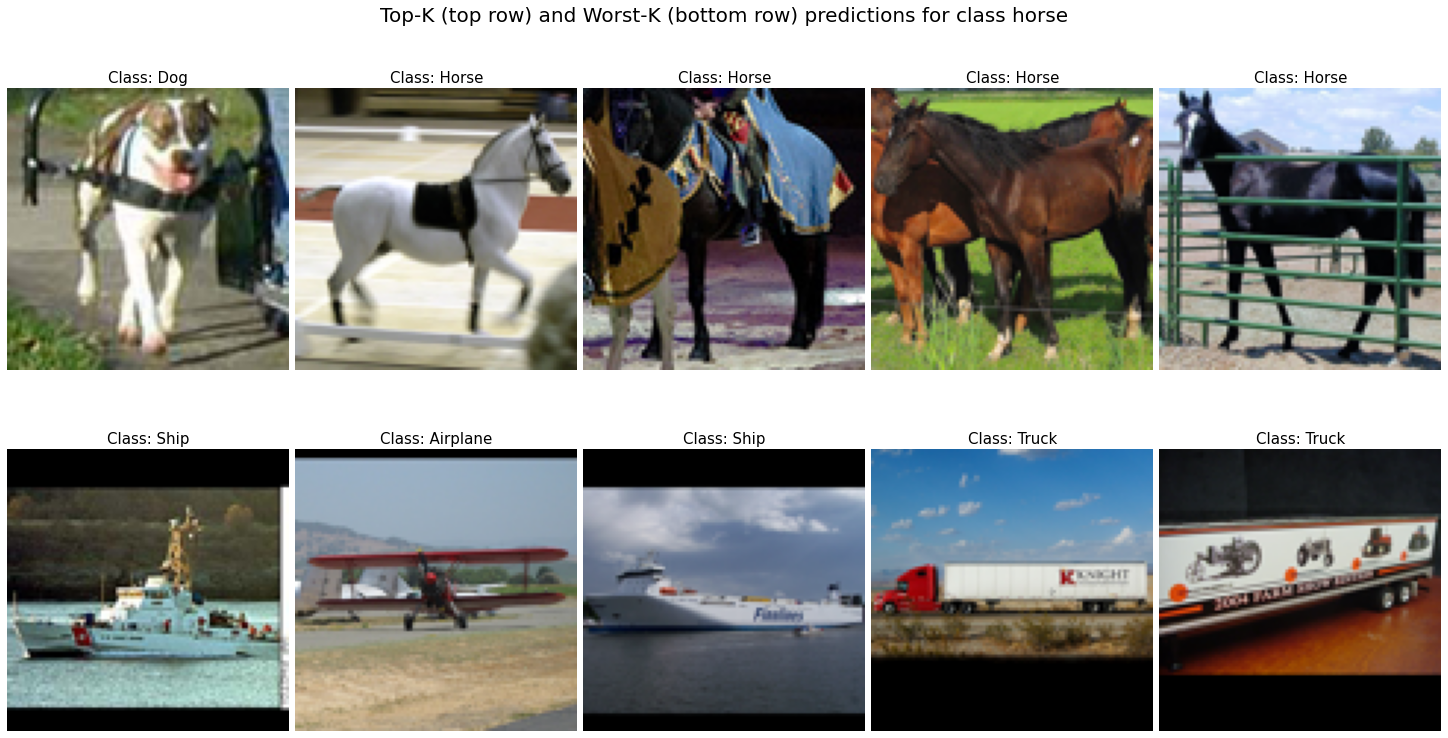

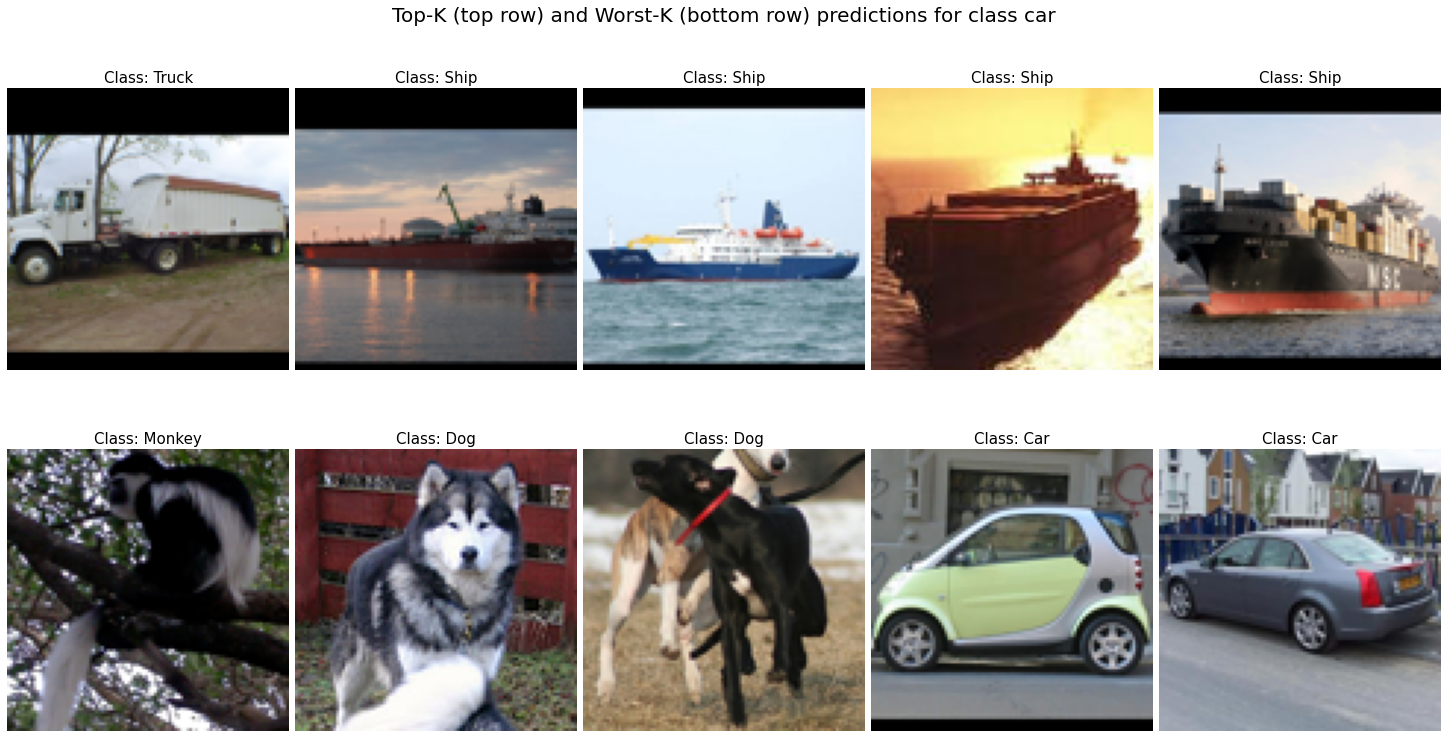

............... SVM Trained with following results on the test set ...............
..... Model: OneVsRestClassifier(estimator=SVC(probability=True))
..... Hyperparameters: Number of clusters 500
|                   |   airplane |     bird |      ship |    horse |       car |     mean |
|:------------------|-----------:|---------:|----------:|---------:|----------:|---------:|
| Average Precision |   0.355194 | 0.110468 | 0.0245985 | 0.482068 | 0.0085628 | 0.196178 |


In [6]:
bow.evaluate(test_data_path=TEST_X_PATH, test_label_path=TEST_y_PATH, show_steps=True)